In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#Remove customer_id column
df2 = df.drop('CustomerId', axis=1)
df2.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Remove rownumber column
df3 = df2.drop('RowNumber', axis=1)
df3.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


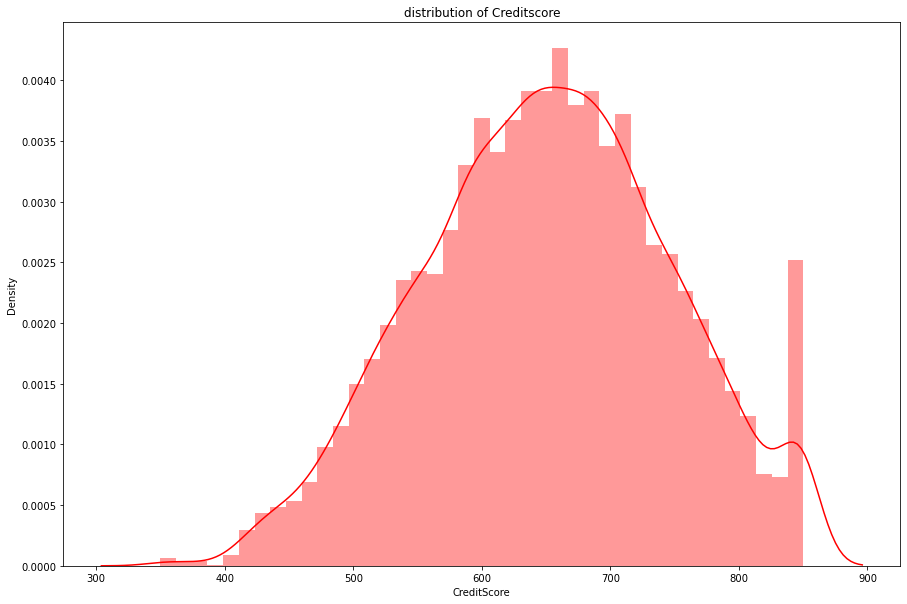

In [43]:
#distribution of creditscore
plt.figure(figsize=(15,10))
plt.title('distribution of Creditscore')
sns.distplot(df3['CreditScore'],color="r");

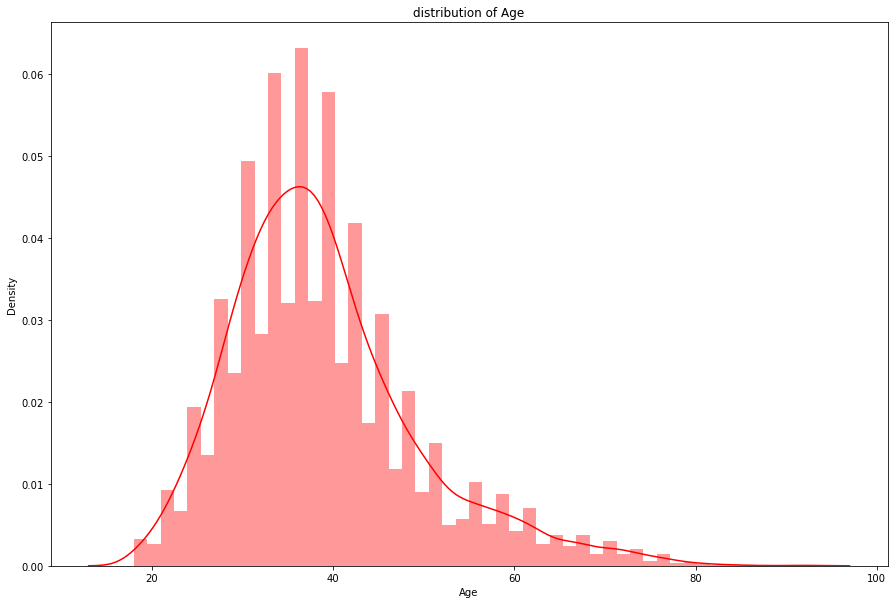

In [42]:
#distribution of Age
plt.figure(figsize=(15,10))
plt.title('distribution of Age')
sns.distplot(df3['Age'],color="r");

<AxesSubplot:xlabel='Geography', ylabel='count'>

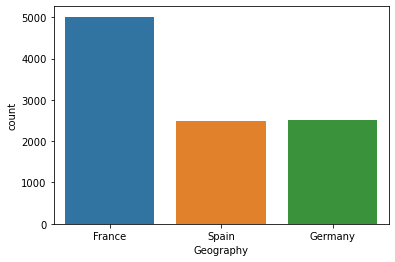

In [39]:
sns.countplot(x='Geography', data=df3)

<AxesSubplot:xlabel='Gender', ylabel='count'>

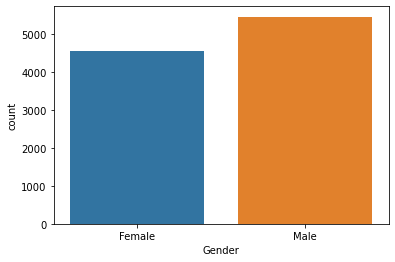

In [40]:
sns.countplot(x='Gender', data=df3)

In [10]:
# Identifying target variable
X = df3.drop('Exited', axis=1)
y = df3['Exited']


In [11]:
#splitting data into test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=7)

In [12]:
X_train['Surname'].unique()

array(['Ozioma', 'Boucaut', 'Robertson', ..., 'Allardyce', 'Candler',
       'Archambault'], dtype=object)

In [13]:
X_train.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
X_train.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [15]:
X_train.CreditScore.unique()

array([629, 570, 556, 624, 664, 523, 793, 588, 704, 707, 500, 404, 596,
       496, 628, 831, 691, 819, 583, 448, 576, 708, 827, 777, 550, 485,
       701, 414, 612, 554, 749, 538, 522, 592, 821, 724, 763, 727, 646,
       755, 543, 676, 525, 623, 797, 613, 479, 577, 665, 850, 660, 695,
       771, 597, 608, 488, 737, 532, 626, 706, 528, 712, 481, 611, 764,
       471, 555, 726, 640, 604, 644, 637, 719, 696, 711, 593, 752, 740,
       662, 656, 670, 634, 738, 773, 540, 747, 703, 411, 590, 765, 645,
       486, 781, 561, 718, 527, 809, 625, 684, 655, 838, 650, 622, 794,
       686, 725, 632, 601, 575, 788, 643, 449, 476, 473, 517, 616, 519,
       565, 520, 537, 651, 795, 521, 753, 715, 534, 498, 776, 607, 591,
       574, 666, 802, 679, 633, 840, 678, 699, 688, 689, 710, 743, 687,
       562, 493, 824, 751, 654, 834, 653, 784, 828, 506, 672, 663, 516,
       762, 748, 668, 572, 467, 649, 524, 744, 563, 659, 775, 814, 713,
       741, 619, 631, 546, 569, 669, 579, 507, 484, 460, 636, 56

In [16]:
X_train.Age.unique()

array([40, 30, 46, 48, 41, 39, 36, 33, 47, 44, 54, 34, 28, 38, 24, 55, 37,
       32, 42, 43, 68, 35, 29, 62, 57, 61, 51, 50, 23, 31, 53, 21, 26, 58,
       27, 45, 56, 52, 22, 70, 25, 71, 59, 63, 92, 49, 60, 72, 69, 76, 66,
       64, 67, 20, 80, 78, 19, 81, 65, 73, 18, 74, 83, 77, 75, 88, 82, 79,
       84], dtype=int64)

In [17]:
X_train.Tenure.unique()

array([ 9,  2,  3,  5,  1,  0,  6,  8,  4,  7, 10], dtype=int64)

In [18]:
X_train.Balance.unique()

array([     0.  , 131406.56, 131764.96, ..., 190678.02, 135871.5 ,
        98684.15])

In [19]:
X_train.NumOfProducts.unique()

array([1, 2, 3, 4], dtype=int64)

In [20]:
X_train.HasCrCard.unique()

array([1, 0], dtype=int64)

In [21]:
X_train.IsActiveMember.unique()

array([0, 1], dtype=int64)

In [22]:
X_train.EstimatedSalary.unique()

array([1.0667000e+02, 4.7952450e+04, 1.0850066e+05, ..., 8.7219410e+04,
       1.2756980e+05, 1.3372057e+05])

In [23]:
# Categorical features of train data
X_train_cat=X_train[['Surname','Geography','Gender']]
X_train_cat

,Surname,Geography,Gender
4989,Ozioma,France,Male
4498,Boucaut,France,Male
8876,Robertson,Spain,Male
670,Bledsoe,Germany,Female
9552,Scott,France,Female
...,...,...,...
919,Hay,Spain,Male
4307,Schnaars,Spain,Male
5699,Wallace,France,Male
537,Lucciano,Spain,Male


In [24]:
# Categorical features of test data
X_test_cat=X_test[['Surname','Geography','Gender']]
X_test_cat

,Surname,Geography,Gender
1977,Johnson,Spain,Male
3880,Andreev,France,Female
52,O'Brien,France,Female
2551,Hsieh,France,Female
2246,Poole,Spain,Female
...,...,...,...
9505,Ts'ao,France,Male
2836,Young,France,Male
1169,Millar,France,Female
9929,Artamonova,Germany,Male


In [25]:
# Numerical features of train data
X_train_num=X_train.drop(columns=['Surname','Geography','Gender'])
X_train_num

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4989,629,40,9,0.00,1,1,0,106.67
4498,570,30,2,131406.56,1,1,1,47952.45
8876,556,46,3,131764.96,1,1,1,108500.66
670,624,48,3,122388.38,2,0,0,30020.09
9552,664,41,5,0.00,1,1,1,152054.33
...,...,...,...,...,...,...,...,...
919,552,45,9,0.00,2,1,0,26752.56
4307,770,46,9,190678.02,1,1,1,14725.36
5699,684,35,6,135871.50,1,1,1,87219.41
537,686,34,9,0.00,2,1,0,127569.80


In [26]:
# Numerical features of test data
X_test_num=X_test.drop(columns=['Surname','Geography','Gender'])
X_test_num

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1977,717,35,1,0.00,3,0,0,174770.14
3880,677,72,8,0.00,2,1,1,153604.44
52,788,33,5,0.00,2,0,0,116978.19
2551,537,53,3,0.00,1,1,1,91406.62
2246,717,39,6,0.00,2,1,0,93275.61
...,...,...,...,...,...,...,...,...
9505,651,28,10,79562.98,1,1,1,74687.37
2836,679,60,8,0.00,2,1,1,51380.90
1169,653,38,8,102133.38,1,1,1,166520.96
9929,755,38,4,111096.91,1,1,1,19762.88


In [27]:
## Categorical Feature - Encoding using OneHotEncoder
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

# Creating object of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown = 'ignore')

## Numerical Feature - Rescaling using Normalization
# scaling the numerical features
from sklearn.preprocessing import MinMaxScaler

# Creating object of MinMaxScaler class
scaler = MinMaxScaler()

## Data Preprocessing on X_train

In [28]:
# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_transformed_cat = pd.DataFrame(encoder.fit_transform(X_train_cat), columns=encoder.get_feature_names_out(X_train_cat.columns), 
index = X_train_cat.index)

X_train_transformed_cat.head()


,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz,...,Surname_Zito,Surname_Zotov,Surname_Zotova,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
4989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_transformed_num = pd.DataFrame(scaler.fit_transform(X_train_num), columns = X_train_num.columns, 
index = X_train_num.index)

X_train_transformed_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4989,0.558,0.297297,0.9,0.000000,0.000000,1.0,0.0,0.000475
4498,0.440,0.162162,0.2,0.551231,0.000000,1.0,1.0,0.239727
8876,0.412,0.378378,0.3,0.552734,0.000000,1.0,1.0,0.542497
670,0.548,0.405405,0.3,0.513401,0.333333,0.0,0.0,0.150057
9552,0.628,0.310811,0.5,0.000000,0.000000,1.0,1.0,0.760286


## Data Preprocessing on X_test.

In [30]:
# Categorical Features
# Use the same 'encoder' object to transform test data
X_test_transformed_cat = pd.DataFrame(encoder.transform(X_test_cat), columns = encoder.get_feature_names_out(X_train_cat.columns), 
index = X_test_cat.index)

X_test_transformed_cat.head()

,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz,...,Surname_Zito,Surname_Zotov,Surname_Zotova,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
1977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Numerical Features
# Use the same 'scaler' object to transform test data
X_test_transformed_num = pd.DataFrame(scaler.transform(X_test_num), columns = X_test_num.columns, index = X_test_num.index)

X_test_transformed_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1977,0.734,0.229730,0.1,0.0,0.666667,0.0,0.0,0.873876
3880,0.654,0.729730,0.8,0.0,0.333333,1.0,1.0,0.768038
52,0.876,0.202703,0.5,0.0,0.333333,0.0,0.0,0.584889
2551,0.374,0.472973,0.3,0.0,0.000000,1.0,1.0,0.457019
2246,0.734,0.283784,0.6,0.0,0.333333,1.0,0.0,0.466365


In [32]:
X_train_transformed=pd.concat([X_train_transformed_cat, X_train_transformed_num], axis=1)
X_train_transformed

,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz,...,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.558,0.297297,0.9,0.000000,0.000000,1.0,0.0,0.000475
4498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.440,0.162162,0.2,0.551231,0.000000,1.0,1.0,0.239727
8876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.412,0.378378,0.3,0.552734,0.000000,1.0,1.0,0.542497
670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.548,0.405405,0.3,0.513401,0.333333,0.0,0.0,0.150057
9552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.628,0.310811,0.5,0.000000,0.000000,1.0,1.0,0.760286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.404,0.364865,0.9,0.000000,0.333333,1.0,0.0,0.133718
4307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.840,0.378378,0.9,0.799866,0.000000,1.0,1.0,0.073576
5699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.668,0.229730,0.6,0.569961,0.000000,1.0,1.0,0.436081
537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.672,0.216216,0.9,0.000000,0.333333,1.0,0.0,0.637852


In [33]:
X_test_transformed=pd.concat([X_test_transformed_cat, X_test_transformed_num], axis=1)
X_test_transformed

,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz,...,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.734,0.229730,0.1,0.000000,0.666667,0.0,0.0,0.873876
3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.654,0.729730,0.8,0.000000,0.333333,1.0,1.0,0.768038
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.876,0.202703,0.5,0.000000,0.333333,0.0,0.0,0.584889
2551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.374,0.472973,0.3,0.000000,0.000000,1.0,1.0,0.457019
2246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.734,0.283784,0.6,0.000000,0.333333,1.0,0.0,0.466365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.602,0.135135,1.0,0.333755,0.000000,1.0,1.0,0.373415
2836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.658,0.567568,0.8,0.000000,0.333333,1.0,1.0,0.256871
1169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.606,0.270270,0.8,0.428434,0.000000,1.0,1.0,0.832626
9929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.810,0.270270,0.4,0.466035,0.000000,1.0,1.0,0.098766


## Training

In [34]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree_classifier = DecisionTreeClassifier(max_depth = 2)
dtree_classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=2)

In [35]:
#Prediction
y_test_pred = dtree_classifier.predict(X_test_transformed)

In [36]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.83

In [37]:
#Prediction
y_train_pred = dtree_classifier.predict(X_train_transformed)

In [38]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_train, y_train_pred)

0.82925